In [82]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

In [93]:
file = "/Users/jeff/simcore/sphero_diffusion_test_spherocylinder.diffusion"
params = pd.read_csv(file,nrows=1,sep=' ')
df = pd.read_csv(file,skiprows=2,sep=' ')

In [94]:
# returns diffusion coefficients for spherocylinders:
# returns tuple with d_par, d_perp, d_rot, d_com
def spheroDiffusion(params):
    l=params.length[0]
    d=params.diameter[0]
    L=l+d
    p=L/d
    lnP = np.log(p)
    d0 = 3.0*np.pi/L
    dPerp = d0/(4*np.pi)*(lnP + 0.839 + 0.185/p + 0.233/p**2)
    dPar = d0/(2*np.pi)*(lnP - 0.207 + 0.980/p - 0.133/p**2)
    dRot = 3*d0/(np.pi*L**2)*(lnP - 0.662 + 0.917/p - 0.050/p**2)
    dCom = (dPar + 2*dPerp)/3.0
    return (dPar,dPerp,dRot,dCom)

In [95]:
t = df.time
msd = df.msd
t = sm.add_constant(t)
est = sm.OLS(msd,t)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    msd   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.882e+07
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        11:44:11   Log-Likelihood:                 2620.0
No. Observations:                1001   AIC:                            -5236.
Df Residuals:                     999   BIC:                            -5226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0106      0.001     -9.511      0.000      -0.013      -0.008
time           2.4099      0.000   6230.502      0.000       2.409       2.411
==============================================================================
Omnibus:                       17.666   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.152
Skew:                           0.178   Prob(JB):                      0.00139
Kurtosis:                       2.566   Cond. No.                         6.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

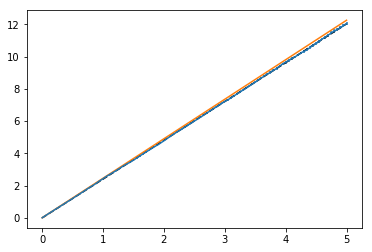

In [105]:
#df.plot.scatter(x="time",y="msd",s=0.2)
dPar,dPerp,dRot,dCom = spheroDiffusion(params)
yTheory=lambda t: 2*params.n_dim[0]*dCom*t
yFit=lambda t: est.params[0] + est.params[1]*t
xFit=np.linspace(df.time.min(),df.time.max(),2)
plt.errorbar(df.time,df.msd,yerr=df.msd_err,errorevery=10)
plt.plot(xFit,yFit(xFit),'k--')
plt.plot(xFit,yTheory(xFit))

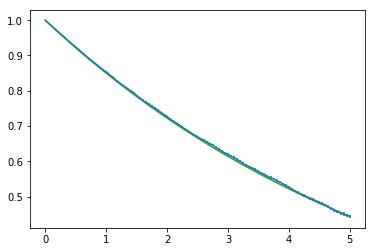

In [106]:
#df.plot.scatter(x="time",y="vcf",s=0.2)
plt.errorbar(df.time,df.vcf,yerr=df.vcf_err,errorevery=10)
vcfTheory=lambda t: np.exp(-2*dRot*t)
tTheory = np.linspace(0,5,20)
plt.plot(t,vcfTheory(t))

In [103]:
params.n_dim[0]

3